## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
# Set header row to 0 to substitute our own column names

In [99]:
df = pd.read_csv('/Users/Rachana 1/Desktop/day-72-matplotlib-programming-languages/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [100]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
# .count() tells us number of non-NaN values in each column

In [8]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time? 

In [ ]:
# The language with the highest number of posts is JavaScript.

In [101]:
# Use .groupby() for the TAG column to look at number of entries 
# and number of posts by programming language. 
# Then .sum() the number of posts to see posts per programming language.

In [104]:
df.groupby('TAG').sum().sort_values('POSTS')

,POSTS
TAG,
assembly,34852
delphi,46212
go,47499
perl,65286
ruby,214582
swift,273055
c,336042
r,356799
c++,684210


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
# The months of data per language are indicated by the values in the 
# DATE column below. 
# The language with the fewest monthes with an entry is Go.

In [ ]:
# .count() the entries in each column to see number of months of 
# entries per programming language

In [47]:
df.groupby('TAG').count().sort_values('DATE', ascending=True)

,DATE,POSTS
TAG,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [5]:
## Selecting an individual cell

In [105]:
# Use the double square bracket notation to look at the second 
# entry in the 'DATE' column or 
# for column names no spaces, use the dot-notation

In [109]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [110]:
df.DATE[1]

'2008-08-01 00:00:00'

In [ ]:
## Inspecting the Data Type

In [112]:
# Type check the contents of the cell. 
# We are not dealing with a date object, but rather with a string.

In [111]:
type(df['DATE'][1])

str

In [ ]:
# Convert the string to a timestamp using the to_datetime() method.
# Check that it worked.

In [114]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Use Pandas' to_datetime() to convert the entire df['DATE'] column

In [115]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [118]:
## Pivoting DataFrames with the .pivot() method

In [ ]:
# .pivot() method example

In [123]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [ ]:
# Supplying arguments to the .pivot() method:
# The index are the categories for the rows. 
# The columns are the categories for the columns. 
# And the values are what you want in the new cells. 

In [124]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [125]:
# If a value is missing, the .pivot() method will insert a NaN value.

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [5]:
# The new dataframe has 145 rows and 14 columns

In [130]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [131]:
# How many rows does the reshaped DataFrame have? How many columns?
reshaped_df.shape

(145, 14)

In [133]:
# Print out the column names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [134]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [135]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [137]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [5]:
# The number of entries is different than total rows in reshaped_df 
# because the .count() method excludes NaN values. 
# When we pivoted the DataFrame the NaN values were inserted 
# when there were no posts for a language in that month 
# (e.g., Swift in July, 2008).

In [5]:
## Dealing with NaN Values

In [ ]:
# Substitute the number 0 for each NaN value in the DataFrame. 
# with the .fillna() method.

In [139]:
reshaped_df.fillna(0, inplace=True)

In [140]:
# The inplace argument means that we are updating reshaped_df. 
# Without this argument we would have to write this:
# reshaped_df = reshaped_df.fillna(0) 

In [141]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [142]:
# Check if there are any NaN values left in the entire DataFrame 
reshaped_df.isna().values.any()    

False

In [179]:
# What was the most popular programming language from 2008 to 2012 
# by the number of posts?

reshaped_df['python'][0]

0.0

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
# Supply values for the horizontal axis (the x-values) and the 
# vertical axis (the y-values) for the chart to the .plot() function 
# The x-values are our dates and the y-values are the number of posts. 

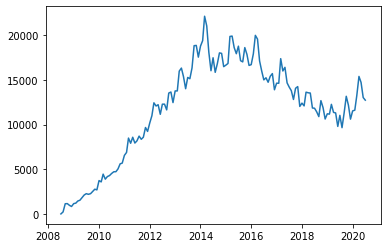

In [150]:
plt.plot(reshaped_df.index, reshaped_df['java'])

In [5]:
## Styling the Chart

# .figure() - allows us to resize our chart

# .xticks() - configures our x-axis

# .yticks() - configures our y-axis

# .xlabel() - add text to the x-axis

# .ylabel() - add text to the y-axis

# .ylim() - allows us to set a lower and upper bound

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

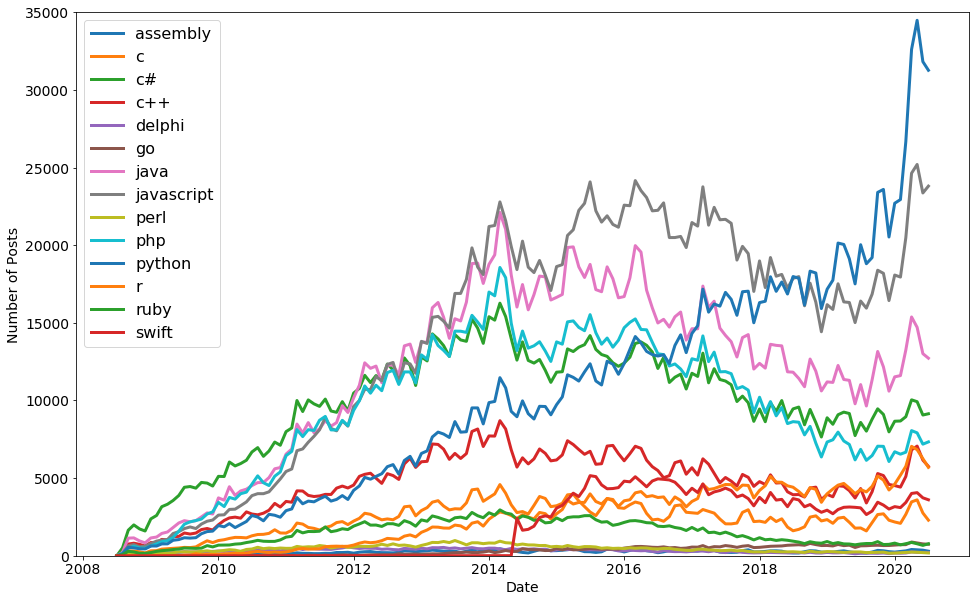

In [168]:
# To make our chart larger, provide a width (16) and a height (10) 
# as the figsize of the figure:

plt.figure(figsize=(16,10)) 

# Increase the fontsize of the ticks on our axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Set a lower limit of 0 for the y-axis with .ylim()
plt.ylim(0, 35000)

# Multi-Line Charts with Matplotib
# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.python)

# Plot all languages using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one observation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

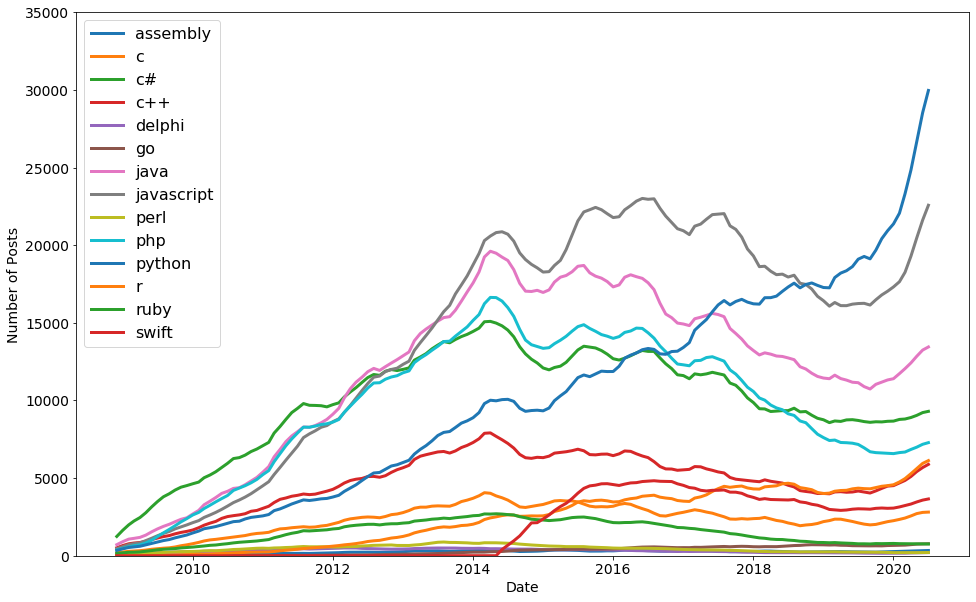

In [173]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

In [ ]:
## Programming Language Data Analysis Quiz

In [203]:
# What was the most popular programming language from 2008 to 2012 
# by the number of posts?

# Select rows for 2008 to 2012
current_df = df[(df['DATE'] > '2008-01-01') & (df['DATE'] <= '2012-12-01')]
current_df.groupby('TAG').sum().sort_values('POSTS', ascending=True)

,POSTS
TAG,
swift,142
go,1509
assembly,6899
delphi,17894
r,20814
perl,22765
ruby,59443
c,76816
python,148417


In [204]:
# What was the most popular programming language from 2015 to 2018?

df[(df['DATE'] > '2015-01-01') & (df['DATE'] <= '2018-12-01')].groupby('TAG').sum().sort_values('POSTS', ascending=True)

,POSTS
TAG,
delphi,13363
assembly,14440
perl,18788
go,26218
ruby,78423
c,127940
r,185735
swift,193051
c++,259631


In [205]:
# What was the most popular programming language in 2020?

df[(df['DATE'] > '2020-01-01') & (df['DATE'] <= '2020-12-01')].groupby('TAG').sum().sort_values('POSTS', ascending=True)

,POSTS
TAG,
delphi,1246
perl,1265
assembly,2051
ruby,4565
go,4656
c,16885
swift,21958
c++,35330
r,36776
